# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### Генерация датасетов

In [3]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2, n_classes=2, 
                                                    n_redundant=0, n_clusters_per_class=1, 
                                                    random_state=7)

In [4]:
reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, 
                                                noise=5, random_state=7)

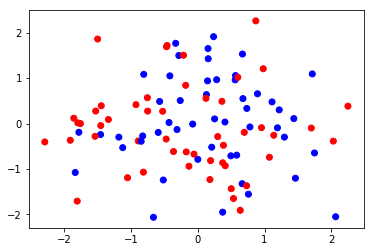

In [9]:
colors = ListedColormap(['red', 'blue'])
plt.scatter([i[0] for i in reg_data], [i[1] for i in reg_data], c=clf_target, cmap=colors);

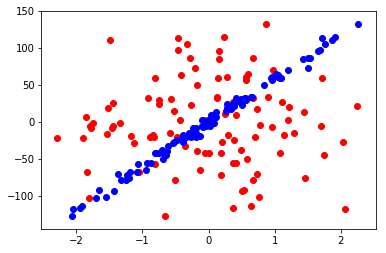

In [10]:
plt.scatter([i[0] for i in reg_data], reg_target, color='r')
plt.scatter([i[1] for i in reg_data], reg_target, color='b');

In [11]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = train_test_split(clf_data, 
                                                                                    clf_target,
                                                                                    test_size=0.3,
                                                                                    random_state=1)

In [12]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = train_test_split(reg_data, 
                                                                                    reg_target,
                                                                                    test_size=0.3,
                                                                                    random_state=1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [13]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1)

In [14]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
predictions = classifier.predict(clf_test_data)

In [16]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [17]:
clf_test_labels

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0])

In [18]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0])

In [19]:
probability_predictions

array([[0.00000000e+00, 1.00000000e+00],
       [9.99999997e-01, 2.90779994e-09],
       [9.99990982e-01, 9.01818055e-06],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.01333183e-14],
       [5.16838702e-07, 9.99999483e-01],
       [6.66133815e-16, 1.00000000e+00],
       [1.00000000e+00, 6.21822808e-13],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999998e-01, 2.30155106e-09],
       [9.99999697e-01, 3.03286910e-07],
       [4.06373790e-03, 9.95936262e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.84496051e-09, 9.99999990e-01],
       [1.00000000e+00, 2.85780656e-10],
       [9.96681204e-01, 3.31879568e-03],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.58409203e-15],
       [1.00000000e+00, 1.62031980e-14],
       [7.25799421e-11, 1.00000000e+00],
       [9.99999999e-01, 1.11892650e-09],
       [9.99999727e-01, 2.73211585e-07],
       [8.97506031e-01, 1.02493969e-01],
       [1.00000000e+00, 1.48816090e-12],
       [9.999995

#### accuracy

In [20]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

In [21]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

#### confusion matrix

In [22]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
matrix

array([[17,  1],
       [ 1, 11]])

In [23]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

28

In [24]:
matrix.diagonal().sum()

28

#### precision 

In [25]:
metrics.precision_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [26]:
metrics.precision_score(clf_test_labels, predictions)

0.9166666666666666

#### recall

In [27]:
metrics.recall_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [28]:
metrics.recall_score(clf_test_labels, predictions)

0.9166666666666666

#### f1

In [29]:
metrics.f1_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [30]:
metrics.f1_score(clf_test_labels, predictions)

0.9166666666666666

#### classification report

In [31]:
metrics.classification_report(clf_test_labels, predictions)

'              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94        18\n           1       0.92      0.92      0.92        12\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

#### ROC curve

In [32]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

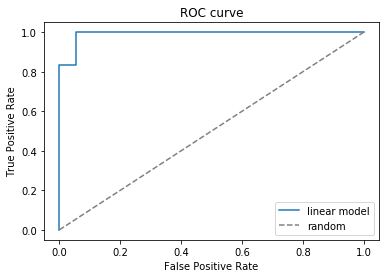

In [33]:
plt.plot(fpr, tpr, label='linear model')
plt.plot([0, 1], [0, 1], '--', color='grey', label='random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right");

#### ROC AUC

In [34]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9305555555555554

In [35]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### PR AUC

In [36]:
metrics.average_precision_score(clf_test_labels, predictions)

0.873611111111111

#### log_loss

In [37]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.21767621111290084

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [41]:
regressor = linear_model.SGDRegressor(random_state=1, max_iter=1000)

In [42]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [43]:
reg_predictions = regressor.predict(reg_test_data)

In [44]:
reg_test_labels

array([   2.67799047,    7.06525927,  -56.43389936,   10.08001896,
        -22.46817716,  -19.27471232,   59.44372825,  -21.60494574,
         32.54682713,  -41.89798772,  -18.16390935,   32.75688783,
         31.04095773,    2.39589626,   -5.04783924,  -70.20925097,
         86.69034305,   18.50402992,   32.31573461, -101.81138022,
         15.14628858,   29.49813932,   97.282674  ,   25.88034991,
        -41.63332253,  -92.11198201,   86.7177122 ,    2.13250832,
        -20.24967575,  -27.32511755])

In [45]:
reg_predictions

array([ -1.11723183,   6.81321085, -51.85979359,   5.59161607,
       -24.14524958,  -8.22456029,  64.26232645, -22.03881516,
        32.12337588, -40.44655595, -17.56996666,  32.55488613,
        28.60317167,  -6.21865482,  -2.87758661, -81.96310113,
        88.69031305,  16.15170487,  24.445708  , -93.05211854,
        15.6982711 ,  33.49060096, 100.18717817,  23.10073764,
       -44.71637644, -98.653947  ,  90.44382163,   0.98738469,
       -16.52997268, -23.73021065])

#### mean absolute error

In [46]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.72525815659585

#### mean squared error

In [47]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

23.480540713305793

#### root mean squared error

In [49]:
import numpy as np

In [50]:
np.sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.845672369579457

#### r2 score

In [51]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.9895986336922454